In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import numpy as np
import mpslib as mps
import matplotlib.pyplot as plt

from scripts.utils import load_binary_from_eleven_sandstones

/home/pedro2/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# Loading data

data_dir = project_root + "/data"
data_paths = [data for data in os.listdir(data_dir) if data.endswith(".raw")]
data_dict = {name[:-4]: load_binary_from_eleven_sandstones(data_dir + "/" + name) for name in data_paths}
data_names = list(data_dict.keys())

In [4]:
def transform_ti(path):
    di = 2
    coarse3d = 1

    Deas = mps.eas.read(path)
    TI = Deas['Dmat']
    
    TI = Deas['Dmat']
    if di>1:
        if coarse3d==0:
            Dmat = TI
            TI = Dmat[::di,::di, :]
        else:
            Dmat = TI
            TI = mps.trainingimages.coarsen_2d_ti(Dmat, di)
    
    mps.eas.write_mat(TI, path)

    return TI, path

The inspiration to this treatment for the data is the strebelle example used in ex01_mpslib_getting_started

eas: writing matrix to ../data/eas/Parker_binary_0.dat 
eas: (nx,ny,nz)=(1000,1000,1) 
eas: title=1000 1000 1
eas: file ->../data/eas/Parker_binary_0.dat
eas: title->         1000 1000 1
eas: header( 0)-> Header
eas: Read data from ../data/eas/Parker_binary_0.dat
eas: converted data in matrixes (Dmat)
eas: writing matrix to ../data/eas/Parker_binary_0.dat 
eas: (nx,ny,nz)=(499,499,4) 
eas: title=499 499 4
eas: writing matrix to ../data/eas/Parker_binary_1.dat 
eas: (nx,ny,nz)=(1000,1000,1) 
eas: title=1000 1000 1
eas: file ->../data/eas/Parker_binary_1.dat
eas: title->         1000 1000 1
eas: header( 0)-> Header
eas: Read data from ../data/eas/Parker_binary_1.dat
eas: converted data in matrixes (Dmat)
eas: writing matrix to ../data/eas/Parker_binary_1.dat 
eas: (nx,ny,nz)=(499,499,4) 
eas: title=499 499 4
eas: writing matrix to ../data/eas/Parker_binary_2.dat 
eas: (nx,ny,nz)=(1000,1000,1) 
eas: title=1000 1000 1
eas: file ->../data/eas/Parker_binary_2.dat
eas: title->         1000 10

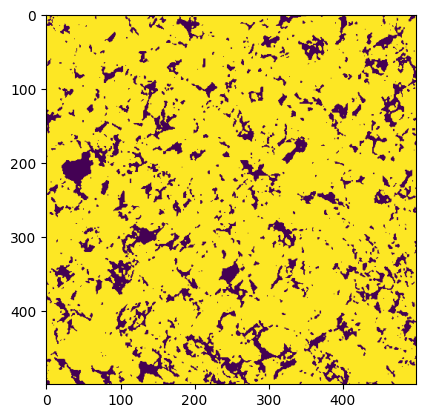

In [8]:
binary = data_names[-1]
for i, data in enumerate(data_dict[binary][:5]):
    # data = data.reshape(1000, 1000, 1)
    path = f"../data/eas/Parker_binary_{i}.dat"
    mps.eas.write_mat(filename=path, D=data)

    TI, path = transform_ti(path=path)
plt.imshow(TI[:,:,0].T)